# White Noise Trial

count    1000.000000
mean        0.000162
std         0.069313
min        -0.301260
25%        -0.035572
50%        -0.000659
75%         0.033574
max         0.268506
dtype: float64


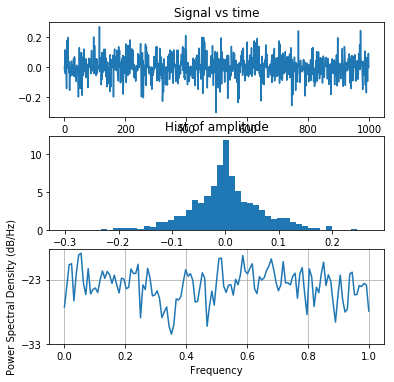

In [7]:
import random
from pandas import Series

signal = [0.1*random.gauss(0.0, np.sin(i)) for i in range(1000)]
signal = Series(signal)

print signal.describe()
plt.figure(figsize = (6,8))
plt.subplot(411)
plt.title("Signal vs time")
plt.plot(signal)
plt.subplot(412)
plt.title("Hist of amplitude")
plt.hist(signal,bins = 50,normed = True)
plt.subplot(413)
plt.psd(signal)
plt.show()

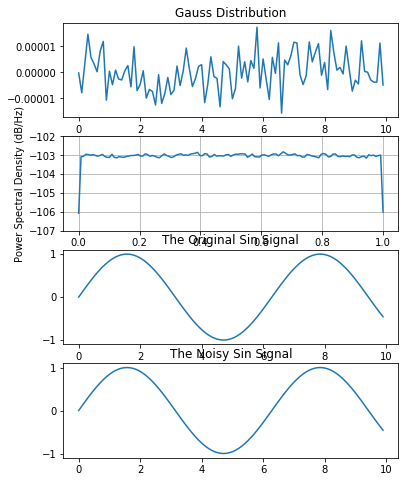

In [12]:
"""
Created on Mon Mar  5 13:41:09 2018

"""

'''
SNR = [-4,-2,0,2,4,6,8,10](dB)
SNR = 10*log10( sum(x**2) / sum(n**2))
程序中用hist()检查噪声是否是高斯分布，psd()检查功率谱密度是否为常数。
'''
import numpy as np
import pylab as plt

def wgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)

t = np.arange(0, 1000000) * 0.1
x = np.sin(t)
snr = 100
n = wgn(x, snr)
xn = x+n # 增加了6dBz信噪比噪声的信号

plt.figure(figsize=(6,8))
plt.subplot(411)
plt.title('Gauss Distribution')
#plt.hist(n, bins=100, normed=True)
plt.plot(t[0:100],n[0:100])
plt.subplot(412)
plt.psd(n)
plt.subplot(413)
plt.plot(t[0:100],x[0:100])
plt.title('The Original Sin Signal')
plt.subplot(414)
plt.plot(t[0:100],xn[0:100])
plt.title('The Noisy Sin Signal')
plt.show()
plt.tight_layout()

# white noise + input signal

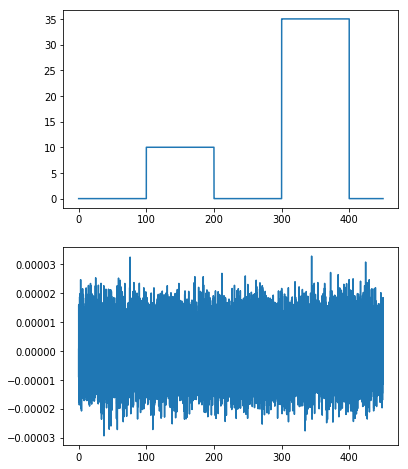

[ 5.37180903e-07 -9.10357808e-06 -5.65476254e-06 ...  2.44732782e-06
  1.84153120e-05 -5.80140306e-06] [0 0 0 ... 0 0 0]


In [18]:
#import zone
import numpy as np
import pylab as plt

#function zone
def signal(t):
    amp = 10*(t>100) - 10*(t>200) + 35*(t>300) - 35*(t>400)
    return amp

def wgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)

#exectution zone
t = np.arange(0.0, 450.0, 0.01)
snr = 100
x = np.sin(t)
n = wgn(x,snr)
inp = signal(t)

#drawing zone
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(t, n + inp)
plt.subplot(212)
plt.plot(t,n)
plt.show()
#test zone
print n,inp